<a href="https://colab.research.google.com/github/Niranjen99/Deep_Learning_Assessment_1/blob/main/MLPDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_svmlight_file
import urllib.request
import os

# Download the libsvm data from a URL
#url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale'
url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes'

data_file = 'data.libsvm'

# Download the data from the URL
urllib.request.urlretrieve(url, data_file)

# Load the libsvm data using scikit-learn
X, y = load_svmlight_file(data_file)

# Convert sparse matrix to a dense NumPy array (if necessary)
X = X.toarray()

print(y)
#change label from -1 to 1 and 1 to 0
y = np.where(y == -1, 1, 0)


# Print shape of the data to confirm
print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)
#print(X)
print(y)

[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.
  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.
  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1

In [67]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train)
# Create a Sequential model
model = Sequential()

# Input layer and first hidden layer with ReLU activation
model.add(Dense(32, input_dim=8, activation='relu'))

# Second hidden layer with ReLU activation
model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))



# Output layer with tanh activation since labels  are classifying between -1 and 1
#model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

[[0.11764706 0.42211055 0.         ... 0.         0.09649872 0.        ]
 [0.52941176 0.56281407 0.67213115 ... 0.42026828 0.51409052 0.48333333]
 [0.05882353 0.69849246 0.37704918 ... 0.42771985 0.24594364 0.01666667]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.6795827  0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.63189275 0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532043 0.07856533 0.        ]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


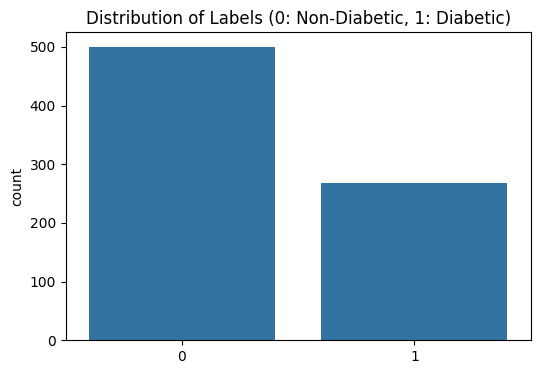

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Labels (0: Non-Diabetic, 1: Diabetic)')
plt.show()

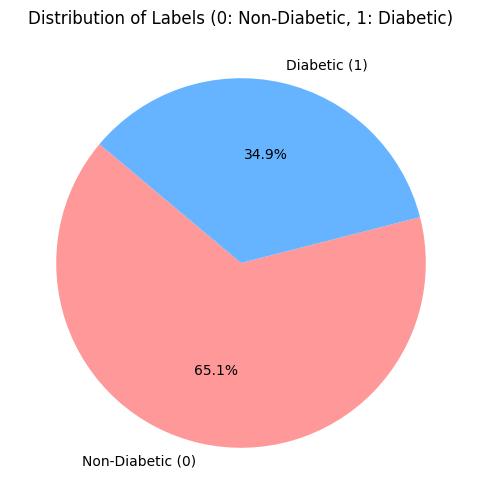

In [46]:


# Calculate the counts of each label
labels, counts = np.unique(y, return_counts=True)
label_names = ['Non-Diabetic (0)', 'Diabetic (1)']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=label_names, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Distribution of Labels (0: Non-Diabetic, 1: Diabetic)')
plt.show()


In [69]:
# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
hist = model.fit(X_train,y_train, epochs =100, validation_data=(X_test, y_test))

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6680 - loss: 0.2321 - val_accuracy: 0.6429 - val_loss: 0.2361
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6368 - loss: 0.2353 - val_accuracy: 0.6429 - val_loss: 0.2322
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.2203 - val_accuracy: 0.6429 - val_loss: 0.2282
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.2202 - val_accuracy: 0.6429 - val_loss: 0.2232
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6177 - loss: 0.2207 - val_accuracy: 0.6494 - val_loss: 0.2192
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.2097 - val_accuracy: 0.6169 - val_loss: 0.2155
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 0.2061 - val_accuracy: 0.6234 - val_loss: 0.2120
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7019 - loss: 0.1987 - val_accuracy: 0.6688 - 

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy_score(y_test, y_pred)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Confusion Matrix:
[[85 14]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        99
           1       0.73      0.69      0.71        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



0.7987012987012987

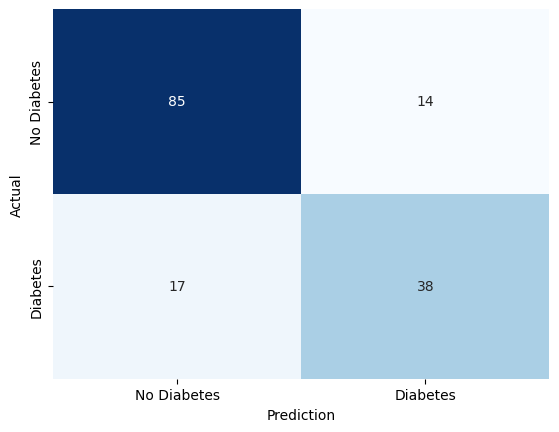

In [71]:

ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

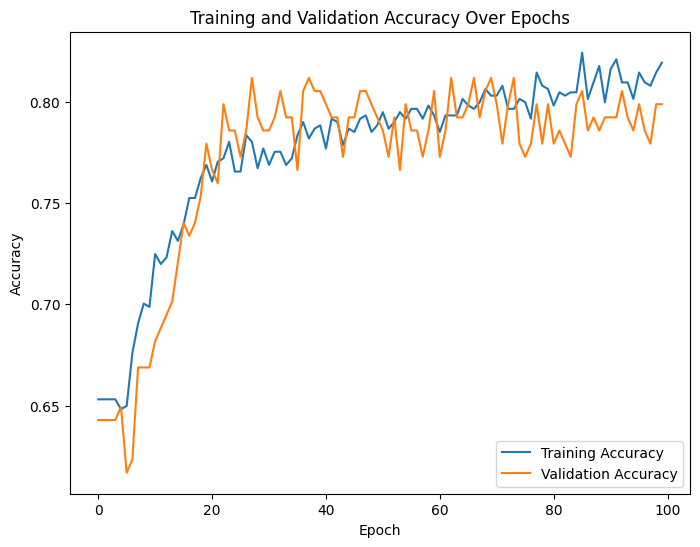

In [72]:


plt.figure(figsize=(8, 6))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


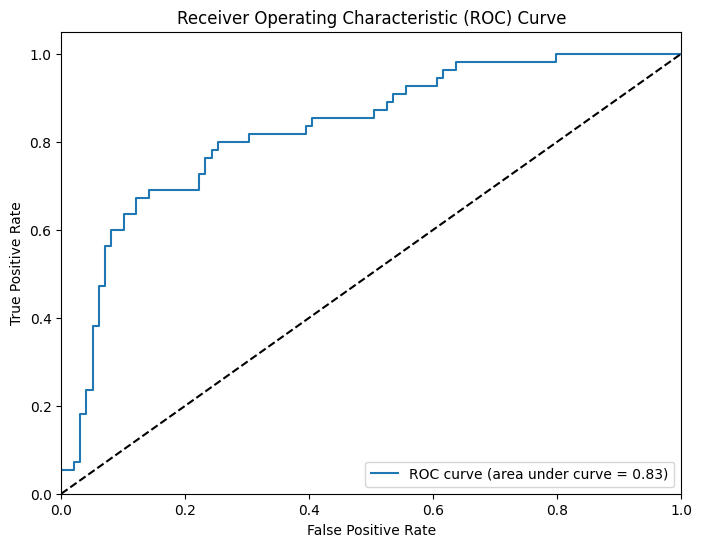

In [73]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for X_test
y_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area under curve = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
